# EDA 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, date, time

## Load data

In [3]:
data_folder='../../data/'
df = pd.read_csv(data_folder + 'clean_complaint_data.csv', dtype={'CMPLNT_NUM': str})
pd.set_option('display.max_columns', None)
print(df.shape)

df.head()


(8893453, 40)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,District_name,case_duration,year_begin
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,Fort Greene/Brooklyn Hts,3.0,2008
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,Upper East Side,0.0,2008
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,Crown Heights North,0.0,2008
3,50594658,2008-08-19,09:00:00,NaN,(null),32.0,2008-08-27,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M,POINT (-73.943226 40.813412),110.0,Central Harlem,inf,2008
4,44451016,2008-03-10,22:00:00,2008-03-10,22:10:00,67.0,2008-03-11,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999602.0,176145.0,<18,BLACK,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M,POINT (-73.944674 40.650142),317.0,East Flatbush,0.0,2008


In [4]:
# --- Larceny ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('GRAND LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('PETIT LARCENY OF MOTOR VEHICLE', 'PETIT LARCENY')

# --- Harassment ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HARRASSMENT 2', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('DISORDERLY CONDUCT', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('JOSTLING', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING/DEVIATE SEX', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FRAUDULENT ACCOSTING', 'HARASSMENT')

# --- Assault ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FELONY ASSAULT', 'ASSAULT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST THE PERSON', 'ASSAULT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ASSAULT 3 & RELATED OFFENSES', 'ASSAULT')

# --- Drug Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CANNABIS RELATED OFFENSES', 'DANGEROUS DRUGS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING FOR DRUG PURPOSES', 'DANGEROUS DRUGS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNDER THE INFLUENCE OF DRUGS', 'DANGEROUS DRUGS')

# --- Weapons Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNLAWFUL POSS. WEAP. ON SCHOOL', 'DANGEROUS WEAPONS')

# --- Sex Crimes ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FELONY SEX CRIMES', 'SEX CRIMES')

# --- Fraud ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FORGERY', 'FRAUDS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('THEFT-FRAUD', 'FRAUDS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES INVOLVING FRAUD', 'FRAUDS')

# --- Public Order Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ADMINISTRATIVE CODE', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ADMINISTRATIVE CODES', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('NEW YORK CITY HEALTH CODE', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('DISRUPTION OF A RELIGIOUS SERV', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST PUBLIC SAFETY', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST PUBLIC ADMINI', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFF. AGNST PUB ORD SENSBLTY &', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('THEFT OF SERVICES', 'OFF. AGNST PUB ORDER')


# --- Traffic Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OTHER TRAFFIC INFRACTION', 'VEHICLE AND TRAFFIC LAWS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS')

# --- Burglary / Trespass ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CRIMINAL TRESPASS', 'BURGLARY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace("BURGLAR'S TOOLS", 'BURGLARY')

# --- Homicide ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT-VEHICLE', 'HOMICIDE-NEGLIGENT')

# --- Child-related ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CHILD ABANDONMENT/NON SUPPORT', 'OFFENSES RELATED TO CHILDREN')

# --- Optional Cleanup (remove or recode nulls) ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('(null)', 'UNKNOWN')

# --- Kidnapping ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('KIDNAPPING & RELATED OFFENSES', 'KIDNAPPING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('KIDNAPPING AND RELATED OFFENSES', 'KIDNAPPING')

# --- Others ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('PROSTITUTION & RELATED OFFENSES', 'PROSTITUTION')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL MISCHIEF')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING/GAMBLING (CARDS, DIC', 'GAMBLING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING', 'GAMBLING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING (BEGGING)', 'GAMBLING')

df['OFNS_DESC'] = df['OFNS_DESC'].replace({
    'PETIT LARCENY': 'Minor Theft',
    'GRAND LARCENY': 'Major Theft',
    'POSSESSION OF STOLEN PROPERTY': 'Stolen Property Possession',
    'ASSAULT': 'Physical Assault',
    'HARASSMENT': 'Verbal or Physical Harassment',
    'CRIMINAL MISCHIEF': 'Vandalism',
    'OFF. AGNST PUB ORDER': 'Public Disturbance',
    'DANGEROUS DRUGS': 'Drug Offenses',
    'DANGEROUS WEAPONS': 'Weapon Possession',
    'VEHICLE AND TRAFFIC LAWS': 'Traffic Violations',
    'BURGLARY': 'Breaking & Entering',
    'FRAUDS': 'Fraud and Forgery',
    'SEX CRIMES': 'Sexual Offenses',
    'RAPE': 'Rape',
    'ARSON': 'Intentional property fire',
    'MURDER & NON-NEGL. MANSLAUGHTER': 'Murder',
    'HOMICIDE-NEGLIGENT': 'Negligent Homicide',
    'GAMBLING': 'Illegal Gambling',
    'KIDNAPPING': 'Kidnapping',
    'OFFENSES RELATED TO CHILDREN': 'Child Abuse/Endangerment',
    'PROSTITUTION': 'Prostitution Offenses'
})

keep_offenses = [
    'Minor Theft',
    'Major Theft',
    'Stolen Property Possession',
    'Physical Assault',
    'Verbal or Physical Harassment',
    'Vandalism',
    'Public Disturbance',
    'Drug Offenses',
    'Weapon Possession',
    'Traffic Violations',
    'Breaking & Entering',
    'Theft with Force',
    'Fraud and Forgery',
    'Rape',
    'Intentional property fire',
    'Murder',
    'Negligent Homicide',
    'Illegal Gambling',
    'Kidnapping',
    'Child Abuse/Endangerment',
    'Prostitution Offenses'
]

df = df[df['OFNS_DESC'].isin(keep_offenses)]
print(df.shape)
df.head()

(8090055, 40)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,District_name,case_duration,year_begin
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,Breaking & Entering,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,Fort Greene/Brooklyn Hts,3.0,2008
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,Major Theft,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,Upper East Side,0.0,2008
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,Physical Assault,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,Crown Heights North,0.0,2008
3,50594658,2008-08-19,09:00:00,NaN,(null),32.0,2008-08-27,341,Minor Theft,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M,POINT (-73.943226 40.813412),110.0,Central Harlem,inf,2008
5,49918184,2008-08-08,01:30:00,2008-08-08,01:34:00,34.0,2008-08-08,355,Physical Assault,115.0,RECKLESS ENDANGERMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),1003778.0,250869.0,(null),(null),(null),NaN,40.855233,-73.929406,"(40.855233, -73.929406)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,E,POINT (-73.929406 40.855233),112.0,Washington Heights,0.0,2008


In [5]:
df_eco=pd.read_csv(data_folder+'eco_data.csv')
df_eco.head()

,District,Year,individuals_below_FPL,Employement_pop_ratio,District_Code
0,Astoria,2005,0.18347,0.593,401
1,Astoria,2006,0.17182,0.592,401
2,Astoria,2007,0.16717,0.603,401
3,Astoria,2008,0.16424,0.638,401
4,Astoria,2009,0.15914,0.608,401


## Crime situation

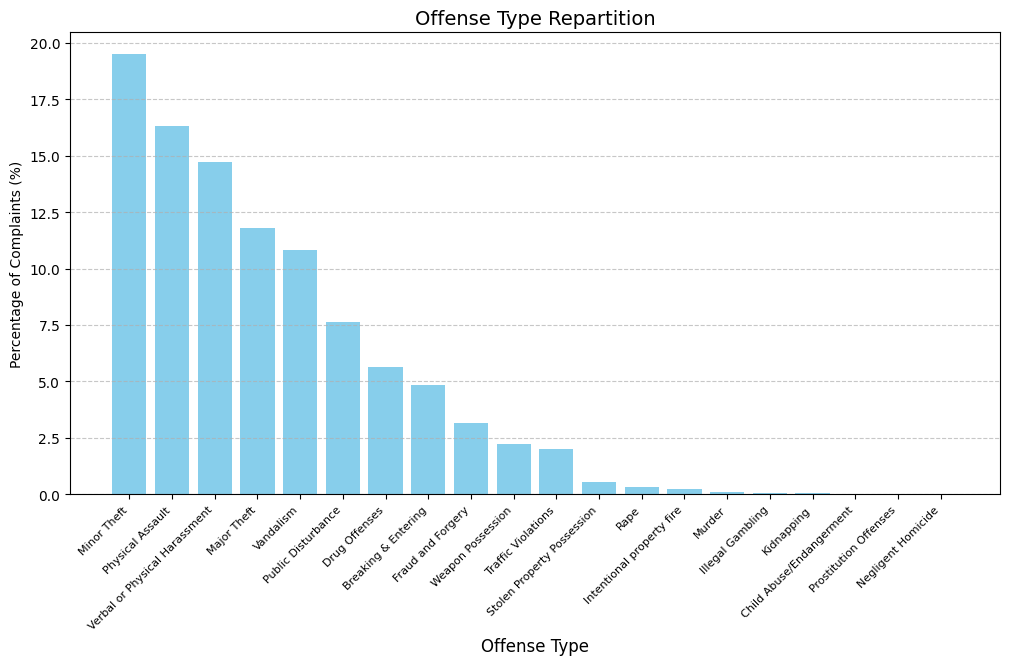

In [6]:
offense_percentage = (df['OFNS_DESC'].value_counts(normalize=True) * 100)

plt.figure(figsize=(12, 6))
plt.bar(offense_percentage.index, offense_percentage.values, color='skyblue')

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel("Percentage of Complaints (%)", fontsize=10)
plt.xlabel("Offense Type", fontsize=12)
plt.title("Offense Type Repartition", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

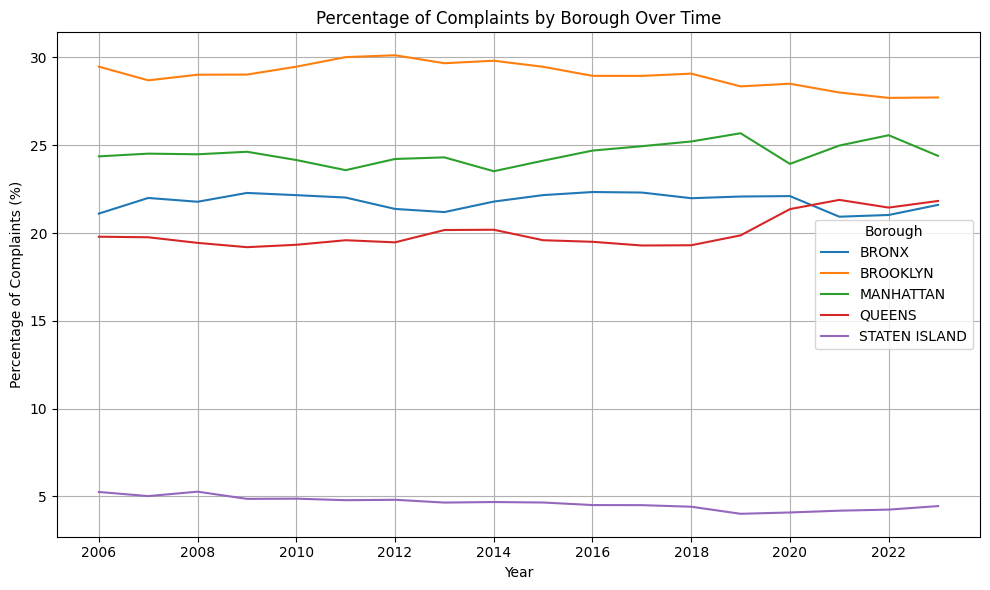

In [7]:
import matplotlib.ticker as mticker

df_clean = df[df['BORO_NM'] != '(null)']


# Group by year and borough, then count complaints
complaints_per_year_boro = df_clean.groupby(['year_begin', 'BORO_NM']).size().unstack(fill_value=0)

# Convert to percentage per year
complaints_percent = complaints_per_year_boro.div(complaints_per_year_boro.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(10, 6))
for boro in complaints_percent.columns:
    plt.plot(complaints_percent.index, complaints_percent[boro], label=boro)

plt.title('Percentage of Complaints by Borough Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Complaints (%)')
plt.legend(title='Borough')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

{'07': 176887, '22': 378776, '03': 167772, '09': 312916, '01': 253203, '06': 120419, '15': 492278, '19': 464590, '11': 338459, '17': 481420, '02': 202394, '21': 405679, '18': 487147, '20': 454318, '23': 342513, '10': 331191, '16': 476615, '00': 364001, '12': 467124, '14': 441274, '08': 283212, '04': 143125, '05': 108199, '13': 396497}


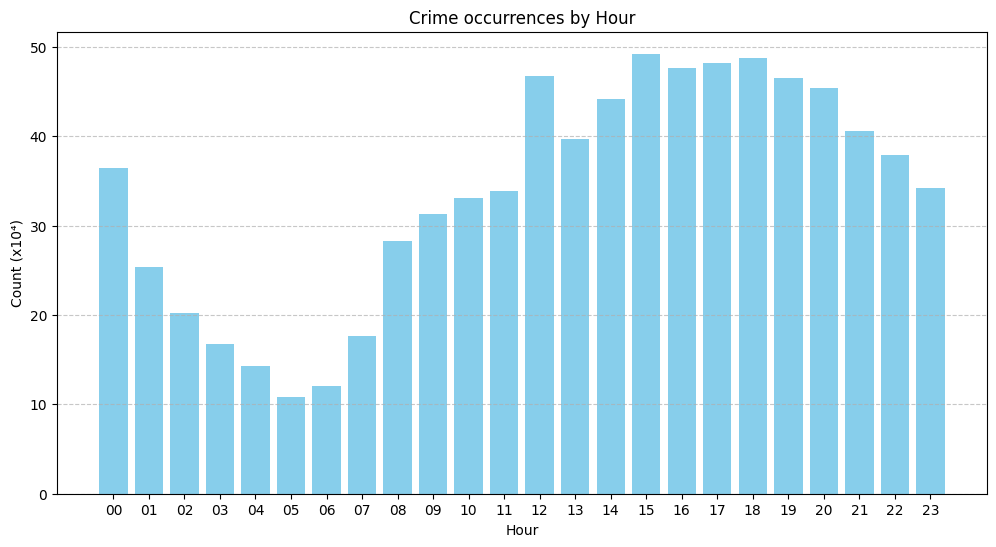

In [8]:
hours=df['CMPLNT_FR_TM'].str[:2]
hours=hours[~(hours=='(n')]
hours_dict=hours.value_counts(sort=False).to_dict()
print(hours_dict)
hours_sorted = dict(sorted(hours_dict.items(), key=lambda x: int(x[0])))

plt.figure(figsize=(12, 6))
plt.bar(hours_sorted.keys(), np.array(list(hours_sorted.values())) / 1e4, color='skyblue')
plt.xlabel("Hour")
plt.ylabel("Count (x10⁴)")
plt.title("Crime occurrences by Hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

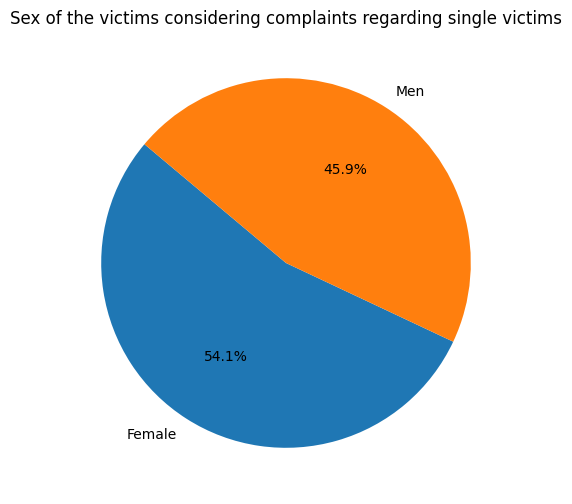

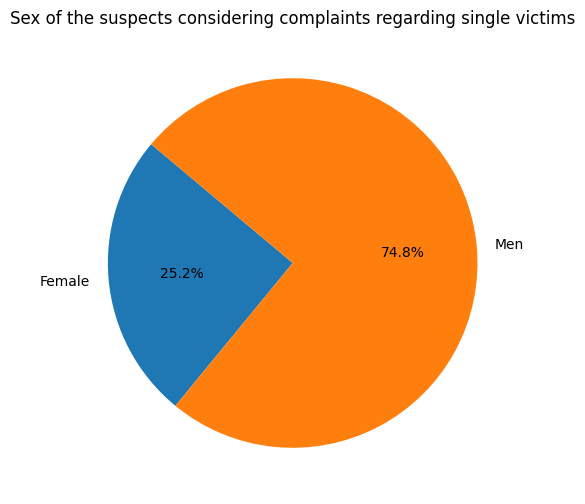

In [9]:
df_gender = df.query("(VIC_SEX == 'F')| (VIC_SEX =='M')")

labels= ["Female", "Men"]
sizes = [df_gender['VIC_SEX'].value_counts().get('F', 0),
         df_gender['VIC_SEX'].value_counts().get('M', 0)]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sex of the victims considering complaints regarding single victims')
plt.show()

df_gender_susp = df[df['SUSP_SEX'].isin(['F', 'M'])]

labels= ["Female", "Men"]
sizes = [df_gender_susp['SUSP_SEX'].value_counts().get('F', 0),
         df_gender_susp['SUSP_SEX'].value_counts().get('M', 0)]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sex of the suspects considering complaints regarding single victims')
plt.show()

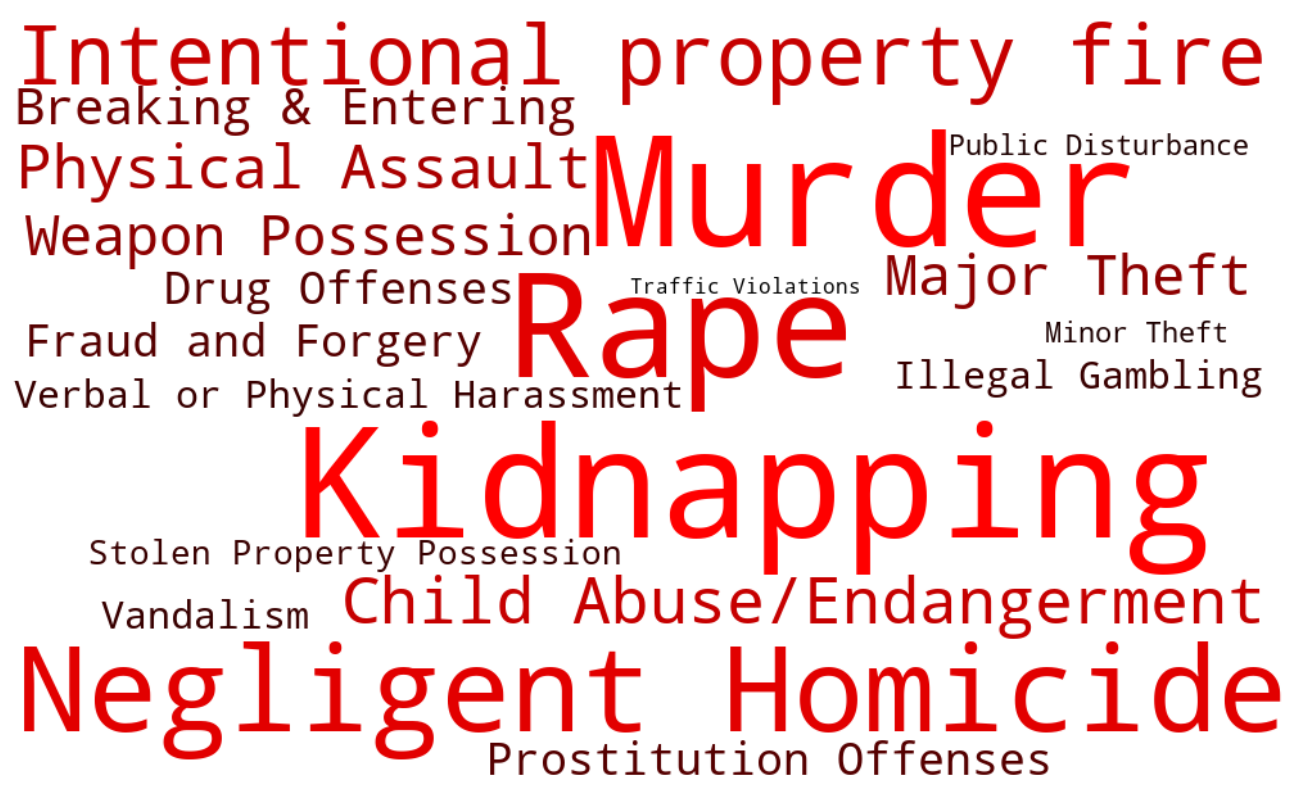

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Severity scores
severity = {
    'Breaking & Entering': 5,
    'Major Theft': 6,
    'Physical Assault': 7,
    'Minor Theft': 2,
    'Verbal or Physical Harassment': 3,
    'Weapon Possession': 6,
    'Vandalism': 3,
    'Fraud and Forgery': 4,
    'Drug Offenses': 4,
    'Public Disturbance': 2,
    'Traffic Violations': 1,
    'Rape': 9,
    'Intentional property fire': 8,
    'Illegal Gambling': 3,
    'Kidnapping': 10,
    'Stolen Property Possession': 3,
    'Child Abuse/Endangerment': 8,
    'Prostitution Offenses': 4,
    'Negligent Homicide': 9,
    'Murder': 10
}

# Color function: black (low severity) to red (high severity)
def black_to_red(word, font_size, position, orientation, random_state=None, **kwargs):
    score = severity.get(word, 1)
    # Normalize score to [0, 1]
    t = (score - 1) / 9  # min=1, max=10
    r = int(255 * t)
    return f"rgb({r},0,0)"  # black to red gradient
# Create word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_font_size=120,
    prefer_horizontal=1.0,
    color_func=black_to_red
).generate_from_frequencies(severity)

# Display it
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
rape_df = df[df['OFNS_DESC'] == 'Rape']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of rape complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Murder']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of murder complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Intentional property fire']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of intentional property fire complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Kidnapping']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of kidnapping complaints per year:", average_rape_per_year)



Average number of rape complaints per year: 1398.2222222222222
Average number of murder complaints per year: 411.3333333333333
Average number of intentional property fire complaints per year: 1085.0555555555557
Average number of kidnapping complaints per year: 186.27777777777777


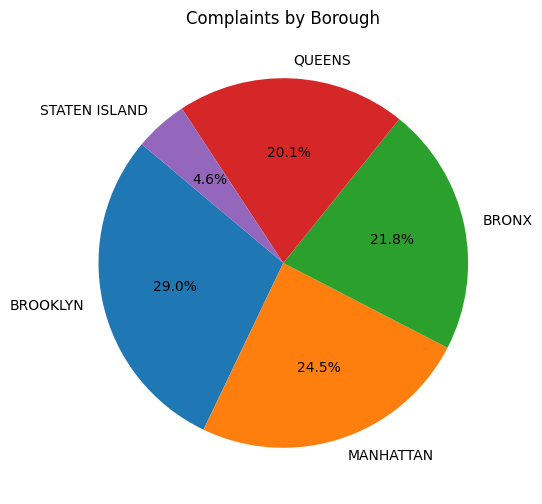

In [12]:
df_clean = df[df['BORO_NM'] != '(null)']

sizes = df_clean['BORO_NM'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=sizes.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Complaints by Borough')
plt.show()

## Time evolution

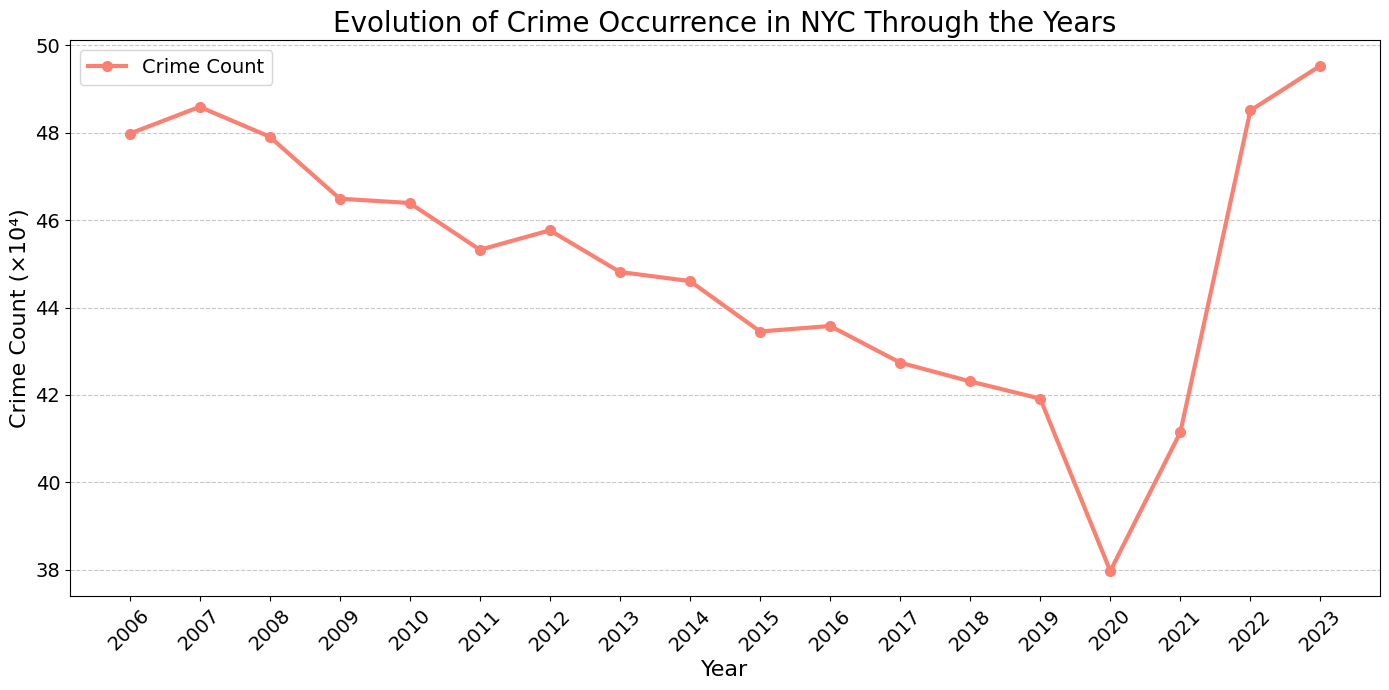

In [30]:
df_year = df.groupby('year_begin').agg(
    nb_crimes=('year_begin', 'size')
).reset_index()

#Crop from 2006 not enough data
df_year = df_year.query("year_begin >= 2006")


plt.figure(figsize=(14, 7))

# Line plot with dots at each year
plt.plot(df_year["year_begin"], df_year["nb_crimes"] / 1e4,
         marker='o', linestyle='-', color='salmon', linewidth=3, markersize=7, label='Crime Count')

# X-axis labels: show every year, rotate for readability
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Labels and title with larger font sizes
plt.xlabel("Year", fontsize=16)
plt.ylabel("Crime Count (×10⁴)", fontsize=16)
plt.title("Evolution of Crime Occurrence in NYC Through the Years", fontsize=20)

# Grid and optional legend
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


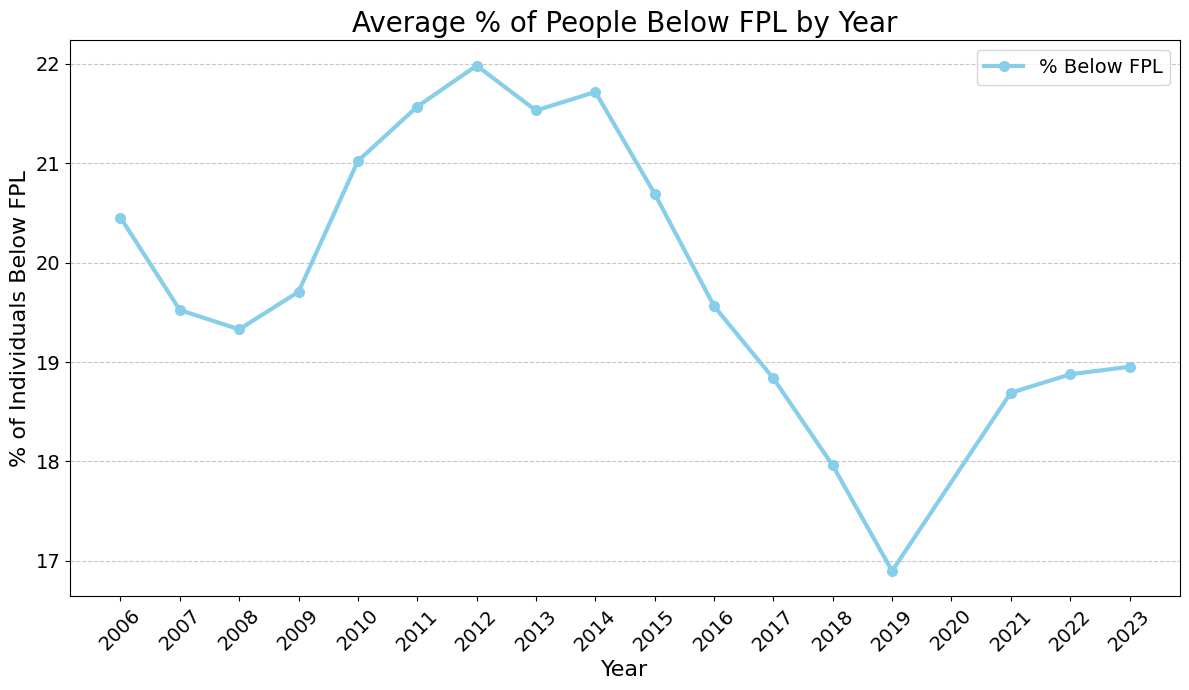

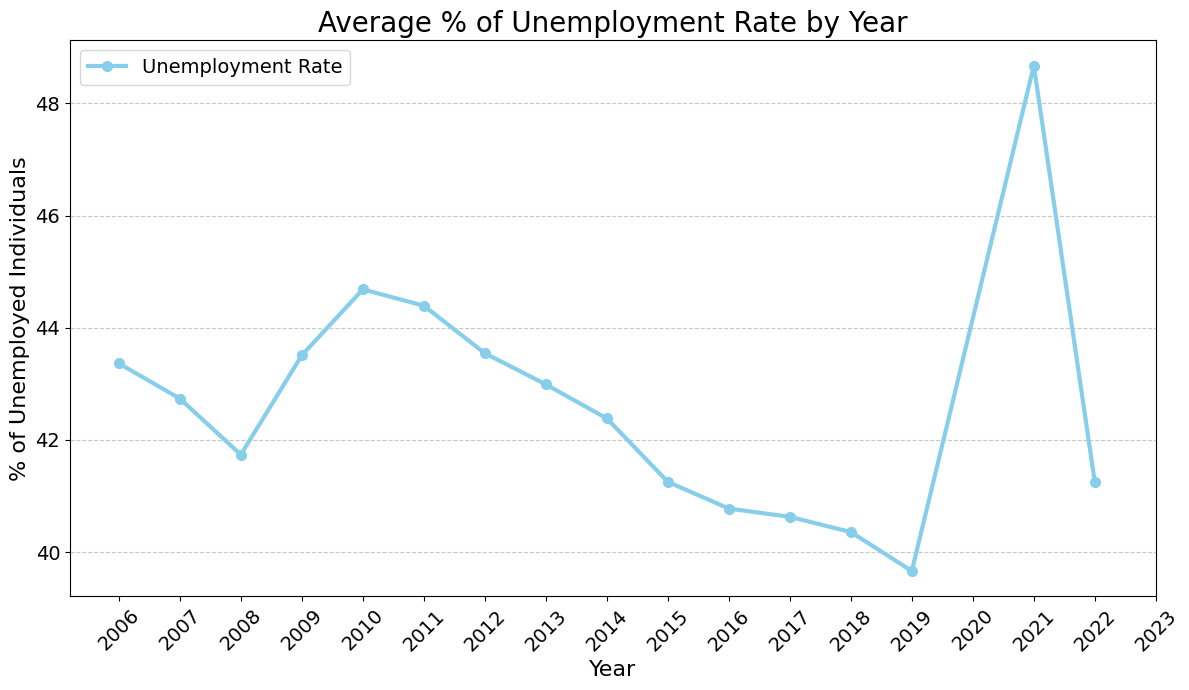

In [14]:
avg_fpl_by_year = df_eco.groupby('Year')['individuals_below_FPL'].mean().reset_index()
avg_fpl_by_year = avg_fpl_by_year.query("Year >= 2006")


emp_by_year = df_eco.groupby('Year')['Employement_pop_ratio'].mean().reset_index()
emp_by_year = emp_by_year.query("Year >= 2006")

import matplotlib.pyplot as plt

# --- Plot 1: % Below FPL ---
plt.figure(figsize=(12, 7))
plt.plot(avg_fpl_by_year['Year'], avg_fpl_by_year['individuals_below_FPL'] * 100,
         marker='o', linestyle='-', color='skyblue', linewidth=3, markersize=7, label='% Below FPL')
plt.title('Average % of People Below FPL by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('% of Individuals Below FPL', fontsize=16)
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


# --- Plot 2: Unemployment Rate ---
plt.figure(figsize=(12, 7))
plt.plot(emp_by_year['Year'], (1 - emp_by_year['Employement_pop_ratio']) * 100,
         marker='o', linestyle='-', color='skyblue', linewidth=3, markersize=7, label='Unemployment Rate')
plt.title('Average % of Unemployment Rate by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('% of Unemployed Individuals', fontsize=16)
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


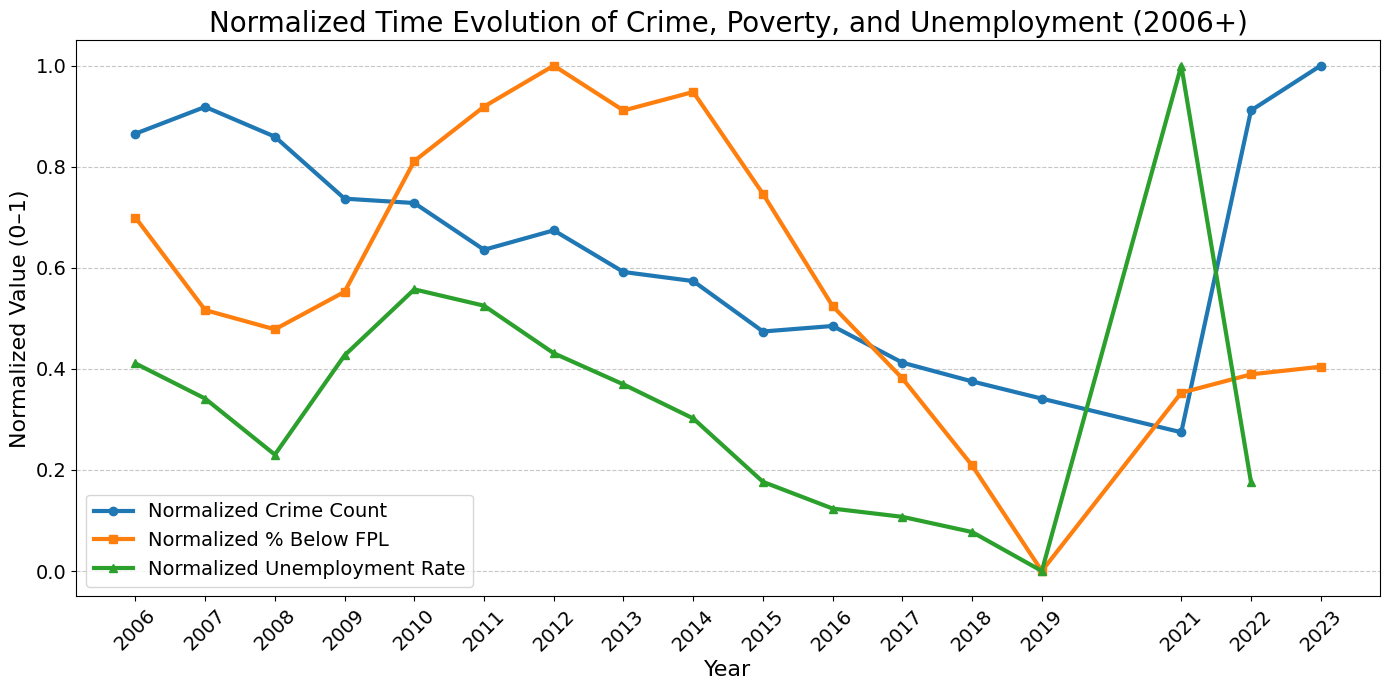

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Normalize helper function ---
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# --- Prepare data ---

# Crime data
df_year = df.groupby('year_begin').agg(nb_crimes=('year_begin', 'size')).reset_index()
df_year = df_year.query("year_begin >= 2006")
df_year['nb_crimes_norm'] = normalize(df_year['nb_crimes'])

# FPL data
avg_fpl_by_year = df_eco.groupby('Year')['individuals_below_FPL'].mean().reset_index()
avg_fpl_by_year = avg_fpl_by_year.query("Year >= 2006")
avg_fpl_by_year['fpl_norm'] = normalize(avg_fpl_by_year['individuals_below_FPL'])

# Unemployment data (1 - employment ratio)
emp_by_year = df_eco.groupby('Year')['Employement_pop_ratio'].mean().reset_index()
emp_by_year = emp_by_year.query("Year >= 2006")
emp_by_year['unemp_rate'] = 1 - emp_by_year['Employement_pop_ratio']
emp_by_year['unemp_norm'] = normalize(emp_by_year['unemp_rate'])

# --- Merge all into one DataFrame for consistency ---
merged = pd.merge(df_year[['year_begin', 'nb_crimes_norm']], 
                  avg_fpl_by_year[['Year', 'fpl_norm']], 
                  left_on='year_begin', right_on='Year')
merged = pd.merge(merged, 
                  emp_by_year[['Year', 'unemp_norm']], 
                  on='Year')

# --- Plot ---
plt.figure(figsize=(14, 7))

plt.plot(merged['year_begin'], merged['nb_crimes_norm'], marker='o', linewidth=3, label='Normalized Crime Count')
plt.plot(merged['year_begin'], merged['fpl_norm'], marker='s', linewidth=3, label='Normalized % Below FPL')
plt.plot(merged['year_begin'], merged['unemp_norm'], marker='^', linewidth=3, label='Normalized Unemployment Rate')

plt.title("Normalized Time Evolution of Crime, Poverty, and Unemployment (2006+)", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Normalized Value (0–1)", fontsize=16)
plt.xticks(merged['year_begin'], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


## Crime number (by type) Vs eco

In [16]:
df_eco_by_district = df_eco.groupby('District_Code').agg(
                    District = ('District', 'first'),
                    individuals_below_FPL_mean = ('individuals_below_FPL', 'mean'),
                    individuals_below_FPL_std = ('individuals_below_FPL', 'std'),
                    Employement_pop_ratio_mean = ('Employement_pop_ratio', 'mean'),
                    Employement_pop_ratio_std = ('Employement_pop_ratio', 'std'),
).reset_index()

df_eco_by_district.head()

,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std
0,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929
1,102,Greenwich Village,0.080824,0.014476,0.703876,0.074474
2,103,Lower East Side,0.262436,0.024255,0.541882,0.016074
3,104,Chelsea/Clinton,0.131956,0.014030,0.690845,0.070434
4,105,Midtown Business District,0.125651,0.016527,0.677218,0.123798


In [17]:
crime_counts = df.groupby(['OFNS_DESC', 'District_Code']).size().reset_index(name='count')
crime_counts.head(10)

# merge the two dataframes on District_Code
df_merged = pd.merge(df_eco_by_district, crime_counts, on='District_Code', how='left')
df_merged.head()



,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std,OFNS_DESC,count
0,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929,Breaking & Entering,2686
1,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929,Child Abuse/Endangerment,8
2,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929,Drug Offenses,1207
3,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929,Fraud and Forgery,8374
4,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929,Illegal Gambling,46


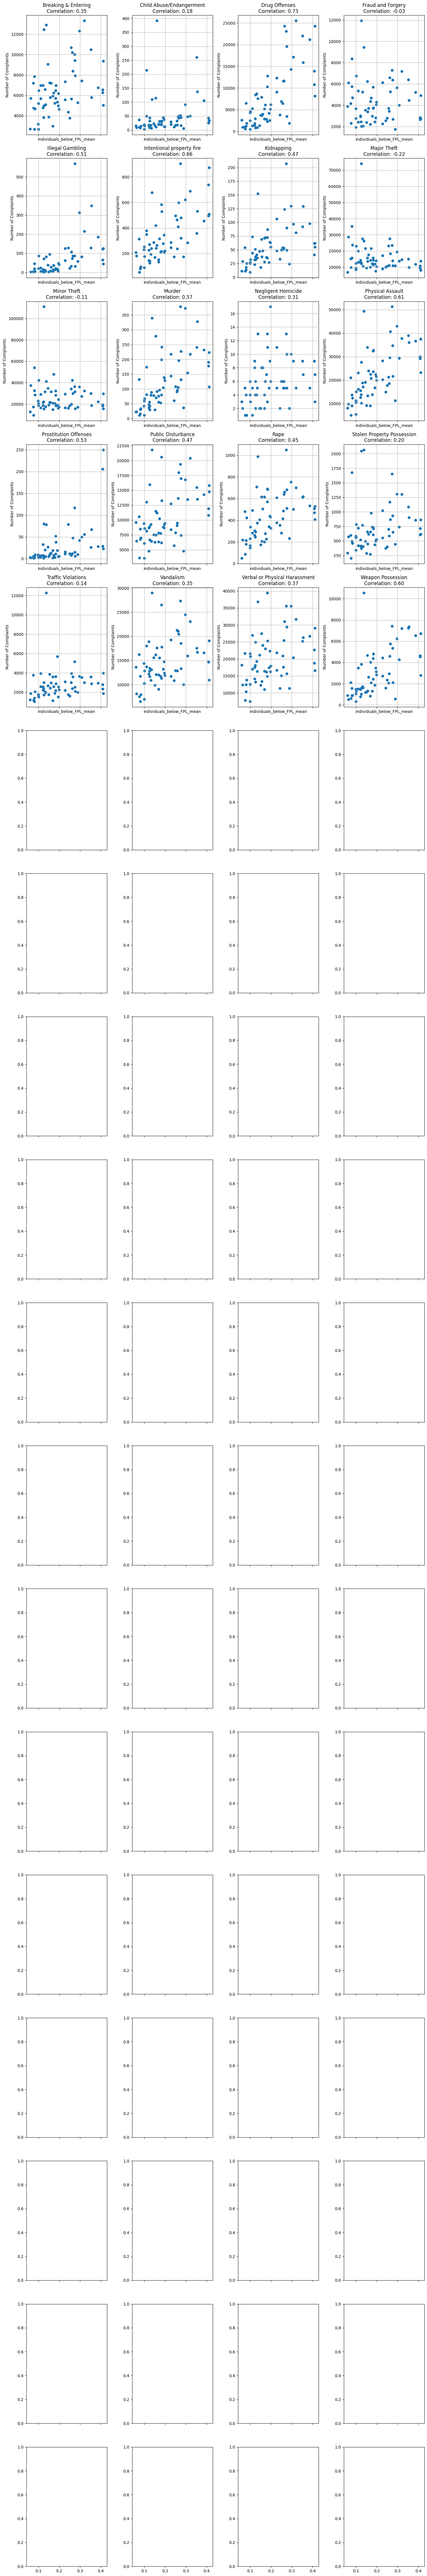

In [18]:
offense_types = df_merged['OFNS_DESC'].unique()
n_offenses = len(offense_types)

# Set up subplots
fig, axes = plt.subplots(18, 4, figsize=(15, 5 * 18), sharex=True)
axes = axes.flatten()  

# If only one offense type, axes isn't an array
if n_offenses == 1:
    axes = [axes]

# Plot each offense type in a separate subplot
for i, offense in enumerate(offense_types):
    subset = df_merged[df_merged['OFNS_DESC'] == offense]
    corr=subset['individuals_below_FPL_mean'].corr(subset['count'])
    axes[i].scatter(subset['individuals_below_FPL_mean'], subset['count'])
    axes[i].set_title(f"{offense}\nCorrelation: {corr:.2f}")
    axes[i].set_xlabel('individuals_below_FPL_mean')
    axes[i].set_ylabel('Number of Complaints')
    axes[i].grid(True)

plt.tight_layout()
plt.show()



In [19]:
#load GPS.csv data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_folder='../data/'

df_gps = pd.read_csv(data_folder + 'website_data/' + 'GPS.csv')

#groupby the two columns 'District_code' and 'count' like this : District_Code, count
                                        #                            101,  45
                                        #                            102,  23 
                                        #                            etc

grouped_df = df_gps.groupby('District_Code', as_index=False)['count'].sum()

grouped_df.head()
 

,District_Code,count
0,101.0,105224
1,102.0,169005
2,103.0,213885
3,104.0,158682
4,105.0,322140


In [20]:
grouped_df.to_json('grouped_data.json', orient='records', lines=False)
